Imporing required libraries


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset,checking null values and getting insights

In [22]:
file_path = 'Advertising.csv'  # Update with your file's path
data = pd.read_csv(r"D:\Machine learning project\Advertising Spend vs Sales\Advertising.csv")
data.head(3)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [23]:
# data.isnull().sum() #no null value present

In [24]:
data.shape

(200, 4)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [26]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Outlier Detection and removing it

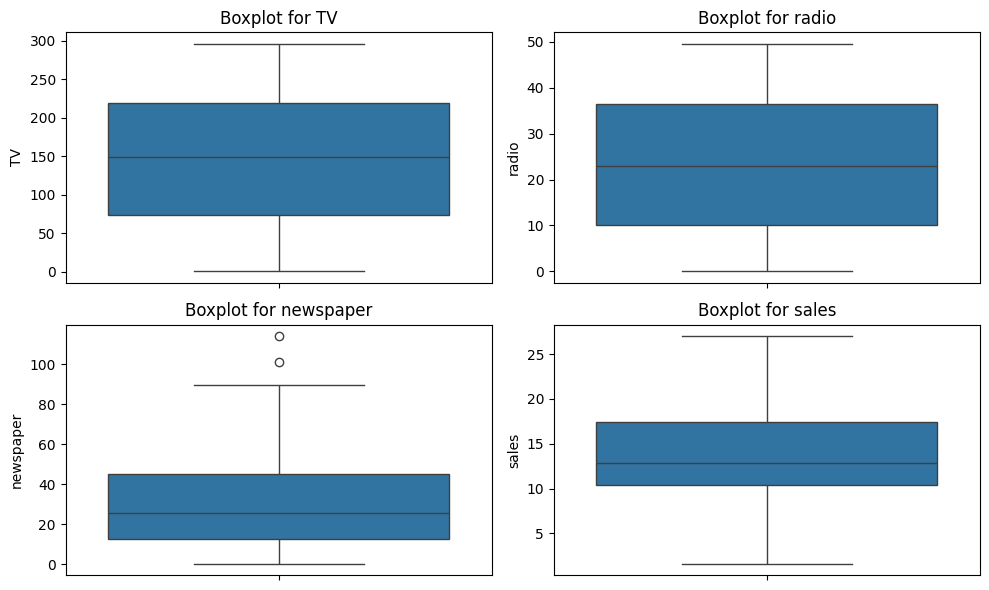

In [27]:
# Outlier Detection with Boxplots
plt.figure(figsize=(10,6))
for i, column in enumerate(['TV', 'radio', 'newspaper', 'sales']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data[column])
    plt.title(f'Boxplot for {column}')
plt.tight_layout()
plt.show()

In [28]:
# Outlier Handling using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [29]:
# Remove outliers from all features
for col in ['TV', 'radio', 'newspaper', 'sales']:
    data = remove_outliers(data, col)

In [30]:
print(f"Dataset size after removing outliers: {data.shape}")

Dataset size after removing outliers: (198, 4)


Data Visualization

<Figure size 1500x400 with 0 Axes>

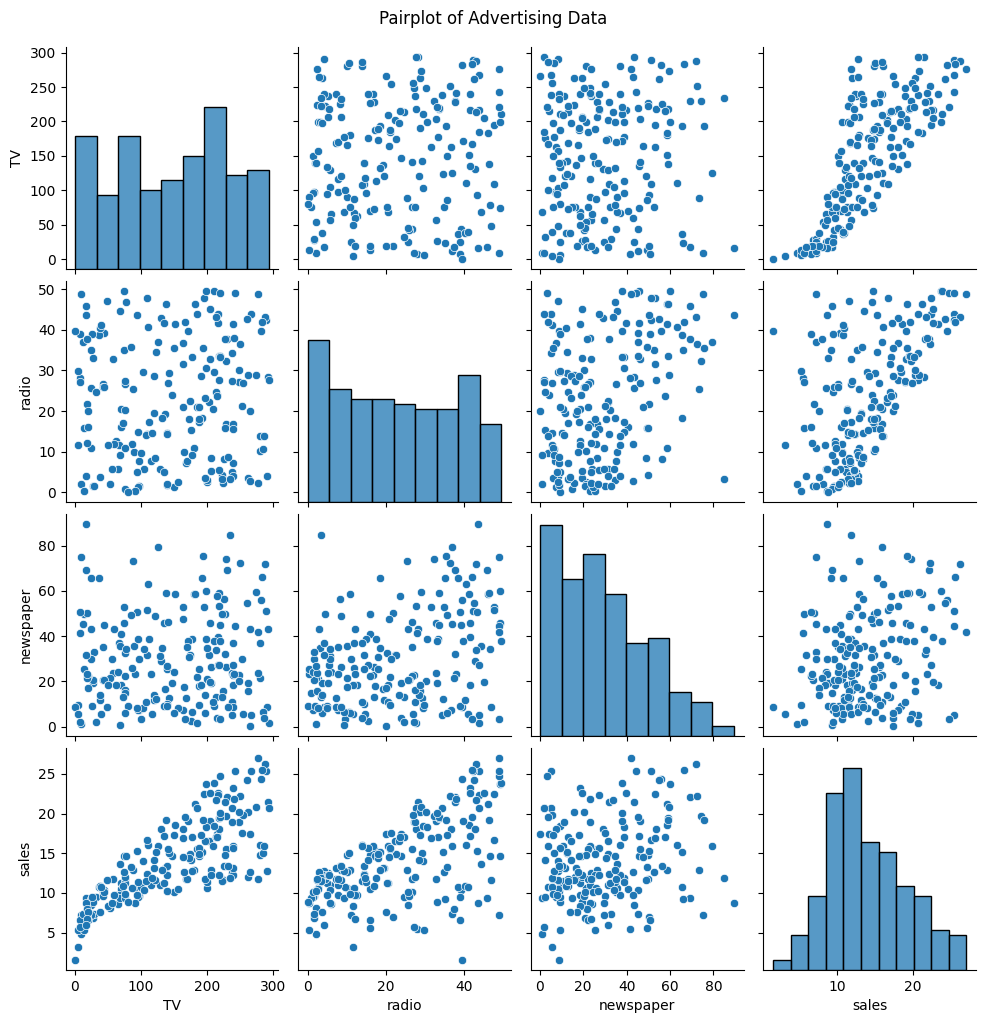

In [32]:
plt.figure(figsize=(15,4))
sns.pairplot(data)
plt.suptitle("Pairplot of Advertising Data", y=1.02)
plt.show()

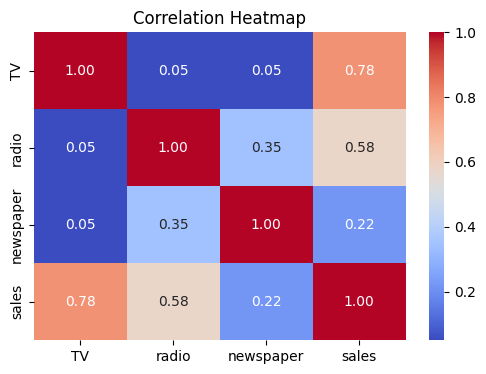

In [35]:
# Heatmap to check correlations
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Data Engineering

In [37]:
X = data.iloc[:,:-1]
y = data['sales']

Train-test split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((158, 3), (40, 3), (158,), (40,))

Model Training

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression()


In [43]:
model.fit(X_train, y_train)

LinearRegression()

checking for overfitting of the model

In [46]:
model.score(X_test,y_test)*100,model.score(X_train,y_train)*100

(89.89454779619588, 89.35961872087125)

Prediction

In [47]:
y_pred = model.predict(X_test)


In [48]:
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [50]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2.74
R-squared: 0.90


Prediction on our trained model

In [51]:
import pickle


In [52]:
# Save the trained model
model_path = 'advertising_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(model, file)

In [53]:
print(f"Model saved to {model_path}")


Model saved to advertising_model.pkl


In [54]:

# Test the model with new data
new_data = pd.DataFrame({
    'TV': [100, 200],
    'radio': [20, 30],
    'newspaper': [10, 5]
})

In [55]:
predictions = model.predict(new_data)
print("Predictions for new data:")
print(predictions)

Predictions for new data:
[11.20106739 17.52266585]
